# Botnet multiclass classification using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: mutliclass calssification of botnet

Raw data from: CTU-13 dataset [1]

-----------------------------------------------------------------------
[1] S. Garc ́ıa et al. An Empirical Comparison of Botnet Detection Methods.
Computers & Security, 45:100–123, 2014

In [18]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [19]:
df = pd.read_csv("../cnsm_final_datasets/botnet_multiclass.csv")

In [20]:
df

,Unnamed: 0.1,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,0,147.32.80.9,147.32.84.165,4,2,134,558,1.312967e+09,1.312967e+09,53,1025,175,105.0,171.542998,29427,-0.009976,87.75,144.00,82,521,439,82,98.024570,115,65.714286,235.084382,0.833333,0.166667,0.542138,2.448366,0.787684,6.603281e-08,9.041915e-08,-2.102222,2.796482,1.918296,0.742098,0.411985,False,0.698970,0.0,0.0,0.497004,0.416667,1.131372,2.255602,0.000006,2.255614,2.276383,0.455277,0.000619,0.000006,2.254977,0.201899,False,1.200000,False,0.0,0.0,1052,0.666667,False,0,0.000000,-453.441475,1109.026765,0.320957,0.885171,0.261034,18.320460,1.12845,1305.172416,NaN,1.385326e+07,207900.070205,0.885171,0.205123,0.417904,NaN,4248.583372,4544.559854,0.564213,0.003325,neris
1,1,1,147.32.84.255,147.32.84.165,38,0,2476,0,1.312967e+09,1.312967e+09,137,137,125,128.0,6.633250,44,-0.899216,128.00,128.00,110,128,18,128,5.306600,4,3.200000,125.329881,0.157895,0.842105,-0.452267,37.236651,22.461333,5.409893e-04,5.634804e-04,0.000000,4.164066,0.629249,0.119904,0.737466,False,0.458925,0.0,0.0,0.428112,0.828125,5.330970,4.501289,1.916961,8.436423,12.452268,0.336548,0.000015,0.000000,1.763265,0.190866,False,0.324324,False,0.0,0.0,4756,1.000000,False,0,0.000000,0.000119,0.208772,0.899673,0.069644,0.057344,0.066138,0.00012,286.717791,923.599485,1.316854e+04,5314.872532,0.038851,0.241710,0.223803,-1.333903,3.640725,0.786195,-0.830029,0.046606,clear
2,2,2,147.32.84.255,147.32.84.165,6,0,1160,0,1.312967e+09,1.312967e+09,138,138,253,261.0,11.874342,141,-0.910340,243.75,261.00,238,261,23,261,4.693416,10,3.952569,253.565245,0.333333,0.666667,-0.673722,41.939166,27.184983,1.990903e-04,2.726156e-04,-0.072464,0.986151,0.918296,0.355245,0.584406,False,0.477121,0.0,0.0,0.666641,0.750000,2.675396,4.012946,0.000012,4.013236,4.013247,0.802649,0.000012,0.000011,4.012922,0.200016,False,0.800000,False,0.0,0.0,1520,1.000000,False,0,0.000000,-318.548520,35.248517,0.499956,0.010243,0.164230,5.155446,0.24979,821.149907,NaN,1.577782e+07,-271216.457937,0.010243,0.393857,0.271931,NaN,214.629001,1171.605316,-0.489713,0.011965,clear
3,3,3,147.32.84.165.,60.190.222.139,4,0,249,0,1.312967e+09,1.312967e+09,1039,65520,122,60.0,124.498996,15500,0.010138,60.00,122.25,60,309,249,60,102.048357,93,76.229508,163.003834,0.750000,0.250000,0.497996,2.457851,0.025423,1.295515e-07,2.243898e-07,-0.991968,1.318585,0.811278,0.405639,0.217397,False,0.477121,0.0,0.0,0.339969,0.791667,0.866065,0.611001,0.305781,2.547480,2.547480,0.849160,0.305781,0.305220,1.936479,0.438507,False,0.666667,False,0.0,0.0,489,1.000000,False,0,0.000000,0.191909,0.999687,0.406980,0.006667,0.664189,0.305992,0.99968,3320.944008,1404.233487,6.634079e+03,-1060.499747,0.006667,0.407122,0.273574,-0.362061,1.505125,2.539462,-0.400313,0.010620,clear
4,4,4,60.190.222.139.,147.32.84.165,10,0,138,0,1.312967e+09,1.312967e+09,65520,1039,73,60.0,20.248457,411,-0.565710,60.00,80.00,60,109,49,60,27.737

In [21]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [22]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    df['LABEL'] = df.LABEL.astype('category')
    df["LABEL_code"] = df["LABEL"].cat.codes

    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


    for F in features:
        if F in bool_features:
            continue
        if F in distribution_features:
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in frequency_features: 
            df.replace([np.inf], -1, inplace=True)
            df.replace([-np.inf], -1, inplace=True)
            df.loc[df[F].isnull(), F] = -1
        else:
            df.replace([np.inf], 0, inplace=True)
            df.replace([-np.inf], 0, inplace=True)
            df.loc[df[F].isnull(), F] = 0


    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)

In [23]:
df

,Unnamed: 0.1,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,0,147.32.80.9,147.32.84.165,4,2,134,558,1.312967e+09,1.312967e+09,53,1025,175,105.0,171.542998,29427,-0.009976,87.75,144.00,82,521,439,82,98.024570,115,65.714286,235.084382,0.833333,0.166667,0.542138,2.448366,0.787684,6.603281e-08,9.041915e-08,-2.102222,2.796482,1.918296,0.742098,0.411985,False,0.698970,0.0,0.0,0.497004,0.416667,1.131372,2.255602,0.000006,2.255614,2.276383,0.455277,0.000619,0.000006,2.254977,0.201899,False,1.200000,False,0.0,0.0,1052,0.666667,False,0,0.000000,-453.441475,1109.026765,0.320957,0.885171,0.261034,18.320460,1.12845,1305.172416,-1.000000,1.385326e+07,207900.070205,0.885171,0.205123,0.417904,-1.000000,4248.583372,4544.559854,0.564213,True,neris,3
1,1,1,147.32.84.255,147.32.84.165,38,0,2476,0,1.312967e+09,1.312967e+09,137,137,125,128.0,6.633250,44,-0.899216,128.00,128.00,110,128,18,128,5.306600,4,3.200000,125.329881,0.157895,0.842105,-0.452267,37.236651,22.461333,5.409893e-04,5.634804e-04,0.000000,4.164066,0.629249,0.119904,0.737466,False,0.458925,0.0,0.0,0.428112,0.828125,5.330970,4.501289,1.916961,8.436423,12.452268,0.336548,0.000015,0.000000,1.763265,0.190866,False,0.324324,False,0.0,0.0,4756,1.000000,False,0,0.000000,0.000119,0.208772,0.899673,0.069644,0.057344,0.066138,0.00012,286.717791,923.599485,1.316854e+04,5314.872532,0.038851,0.241710,0.223803,-1.333903,3.640725,0.786195,-0.830029,True,clear,0
2,2,2,147.32.84.255,147.32.84.165,6,0,1160,0,1.312967e+09,1.312967e+09,138,138,253,261.0,11.874342,141,-0.910340,243.75,261.00,238,261,23,261,4.693416,10,3.952569,253.565245,0.333333,0.666667,-0.673722,41.939166,27.184983,1.990903e-04,2.726156e-04,-0.072464,0.986151,0.918296,0.355245,0.584406,False,0.477121,0.0,0.0,0.666641,0.750000,2.675396,4.012946,0.000012,4.013236,4.013247,0.802649,0.000012,0.000011,4.012922,0.200016,False,0.800000,False,0.0,0.0,1520,1.000000,False,0,0.000000,-318.548520,35.248517,0.499956,0.010243,0.164230,5.155446,0.24979,821.149907,-1.000000,1.577782e+07,-271216.457937,0.010243,0.393857,0.271931,-1.000000,214.629001,1171.605316,-0.489713,True,clear,0
3,3,3,147.32.84.165.,60.190.222.139,4,0,249,0,1.312967e+09,1.312967e+09,1039,65520,122,60.0,124.498996,15500,0.010138,60.00,122.25,60,309,249,60,102.048357,93,76.229508,163.003834,0.750000,0.250000,0.497996,2.457851,0.025423,1.295515e-07,2.243898e-07,-0.991968,1.318585,0.811278,0.405639,0.217397,False,0.477121,0.0,0.0,0.339969,0.791667,0.866065,0.611001,0.305781,2.547480,2.547480,0.849160,0.305781,0.305220,1.936479,0.438507,False,0.666667,False,0.0,0.0,489,1.000000,False,0,0.000000,0.191909,0.999687,0.406980,0.006667,0.664189,0.305992,0.99968,3320.944008,1404.233487,6.634079e+03,-1060.499747,0.006667,0.407122,0.273574,-0.362061,1.505125,2.539462,-0.400313,True,clear,0
4,4,4,60.190.222.139.,147.32.84.165,10,0,138,0,1.312967e+09,1.312967e+09,65520,1039,73,60.0,20.248457,411,-0.565710,60.0

In [24]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
1,clear,0
160181,donbot,1
94631,fast_flux,2
0,neris,3
165017,qvod,4
50019,rbot,5


In [25]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['clear', 'donbot', 'fast_flux', 'neris', 'qvod', 'rbot']

In [26]:
df = df[["LABEL_code"] + features].copy()

In [27]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [28]:
df.shape

(176640, 74)

In [29]:
df_validation = df.sample(n = 25000)
df_features =  df[~df.isin(df_validation)].dropna()

In [30]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [31]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [32]:
y_train.value_counts()

0.0    99464
3.0     3834
2.0     2619
4.0      178
5.0       36
1.0       17
Name: LABEL_code, dtype: int64

In [33]:
y_test.value_counts()

0.0    42627
3.0     1644
2.0     1123
4.0       76
5.0       15
1.0        7
Name: LABEL_code, dtype: int64

In [34]:
df_validation["LABEL_code"].value_counts()

0.0    23482
3.0      854
2.0      625
4.0       32
5.0        4
1.0        3
Name: LABEL_code, dtype: int64

In [39]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='macro')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 30, 5),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 300, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [40]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [1:12:59<00:00, 43.80s/trial, best loss: -0.8663217865191184] 
The best hyperparameters are :  

{'colsample_bytree': 0.9726692639013753, 'gamma': 1.835123595733879, 'max_depth': 30.0, 'min_child_weight': 3.0, 'n_estimators': 300.0, 'reg_alpha': 1.0, 'reg_lambda': 0.681007253845867}


In [41]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

              precision    recall  f1-score   support

       clear     0.9996    1.0000    0.9998     42627
      donbot     1.0000    0.7143    0.8333         7
   fast_flux     0.9478    0.9546    0.9512      1123
       neris     0.9634    0.9611    0.9622      1644
        qvod     1.0000    0.9211    0.9589        76
        rbot     1.0000    0.2000    0.3333        15

    accuracy                         0.9970     45492
   macro avg     0.9851    0.7918    0.8398     45492
weighted avg     0.9970    0.9970    0.9969     45492



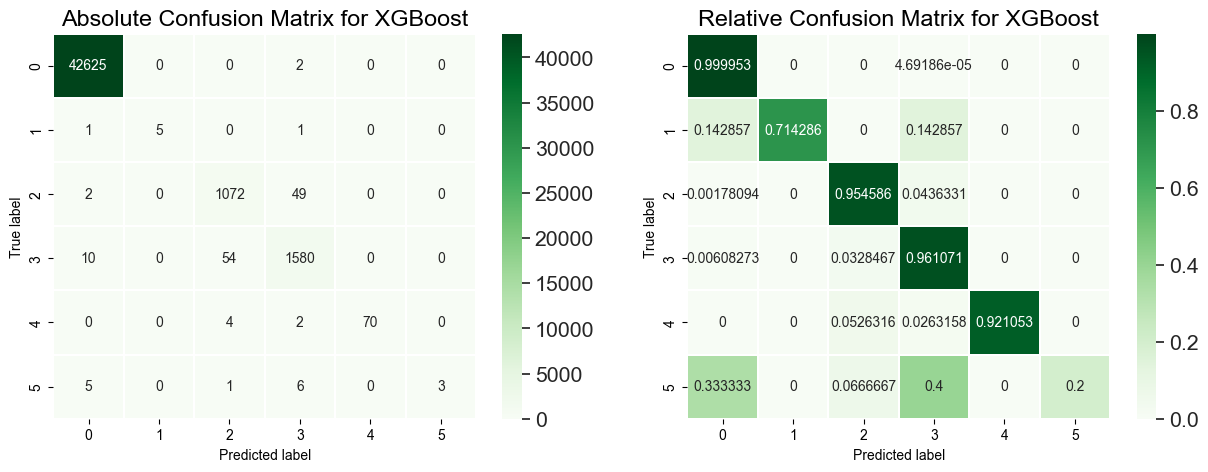

In [42]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [43]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='micro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [44]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=25)

24
              precision    recall  f1-score   support

       clear     0.9996    0.9999    0.9998     42627
      donbot     1.0000    0.8571    0.9231         7
   fast_flux     0.9648    0.9510    0.9578      1123
       neris     0.9593    0.9751    0.9671      1644
        qvod     0.9848    0.8553    0.9155        76
        rbot     1.0000    0.2000    0.3333        15

    accuracy                         0.9973     45492
   macro avg     0.9848    0.8064    0.8494     45492
weighted avg     0.9973    0.9973    0.9972     45492



              precision    recall  f1-score   support

       clear     0.9997    1.0000    0.9999     23482
      donbot     1.0000    0.6667    0.8000         3
   fast_flux     0.9479    0.9600    0.9539       625
       neris     0.9682    0.9625    0.9654       854
        qvod     1.0000    0.8438    0.9153        32
        rbot     0.5000    0.2500    0.3333         4

    accuracy                         0.9973     25000
   macro avg     0.9026    0.7805    0.8279     25000
weighted avg     0.9973    0.9973    0.9973     25000



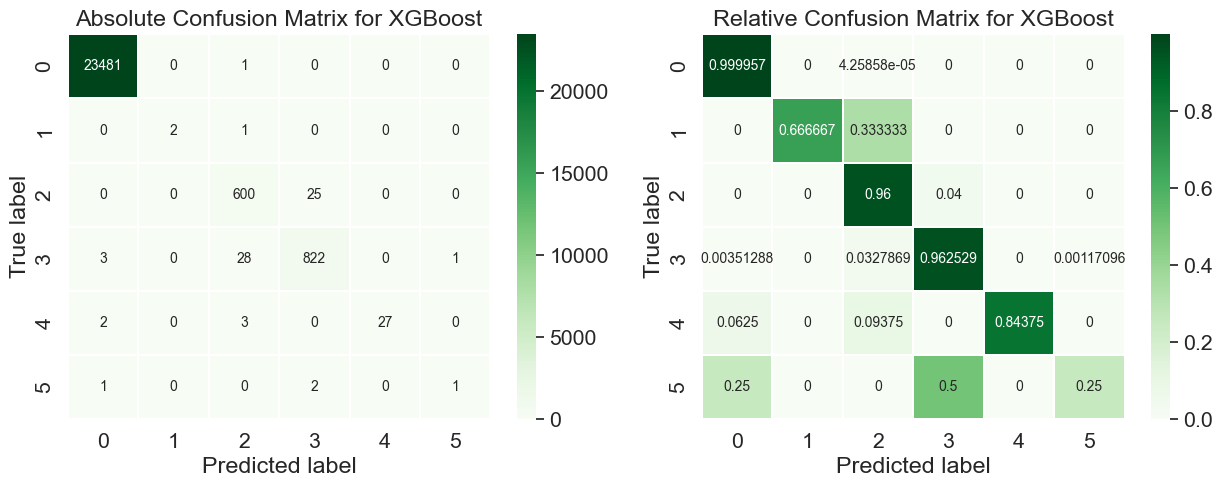

In [45]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

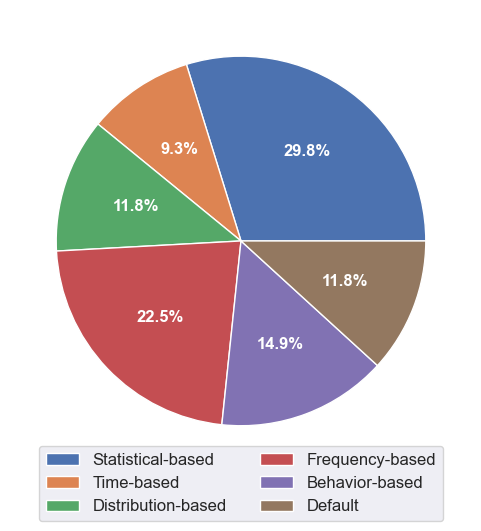

In [46]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_df = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_df]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based",  "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [47]:
data

[0.31927288, 0.09996917, 0.12628278, 0.24097803, 0.15956329, 0.12628278]

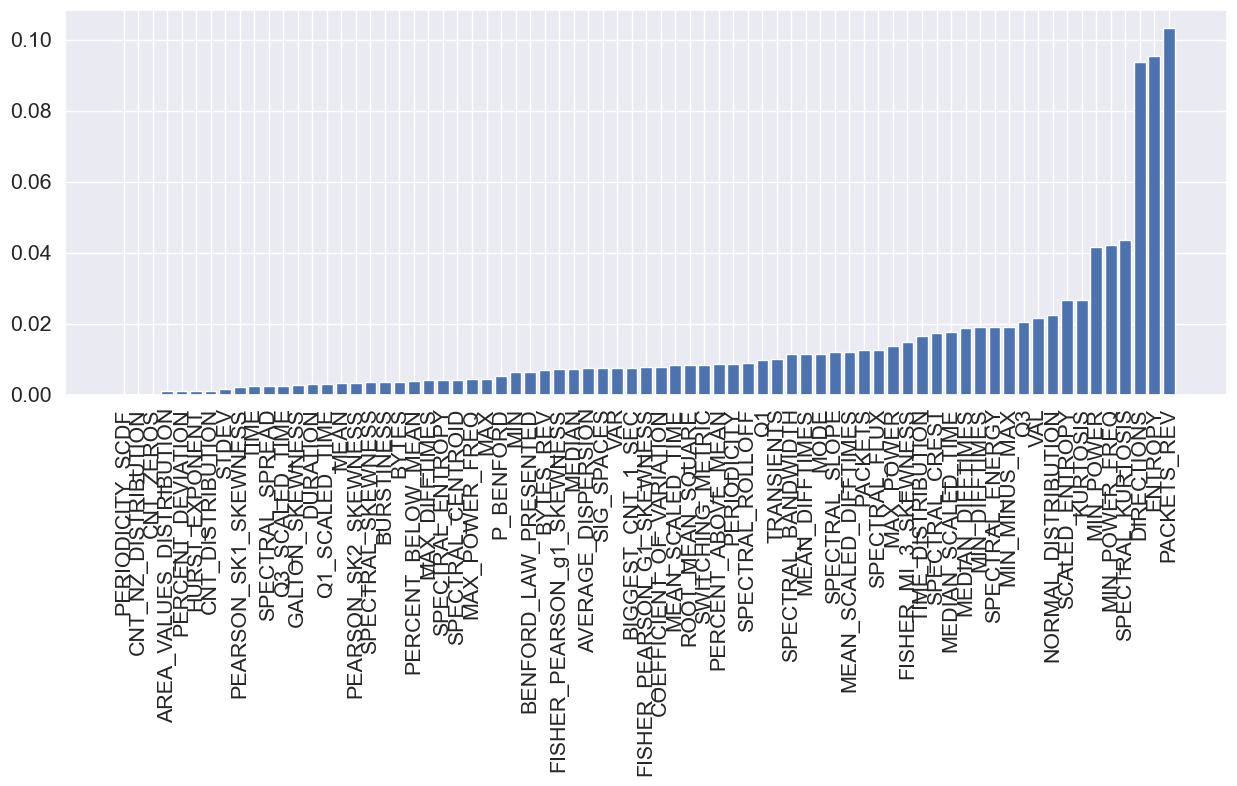

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [49]:
feat_importances

PERIODICITY_SCDF            0.000000
CNT_NZ_DISTRIBUTION         0.000000
CNT_ZEROS                   0.000000
AREA_VALUES_DISTRIBUTION    0.000977
PERCENT_DEVIATION           0.001092
                              ...   
MIN_POWER_FREQ              0.042232
SPECTRAL_KURTOSIS           0.043519
DIRECTIONS                  0.093584
ENTROPY                     0.095457
PACKETS_REV                 0.103285
Length: 73, dtype: float32

In [50]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'CNT_NZ_DISTRIBUTION': 0.0,
 'CNT_ZEROS': 0.0,
 'AREA_VALUES_DISTRIBUTION': 0.0009774329373613,
 'PERCENT_DEVIATION': 0.0010920957429334521,
 'HURST_EXPONENT': 0.001112982165068388,
 'CNT_DISTRIBUTION': 0.001128194504417479,
 'STDEV': 0.0016313515370711684,
 'PEARSON_SK1_SKEWNESS': 0.0021014700178056955,
 'TIME': 0.0023403239902108908,
 'SPECTRAL_SPREAD': 0.0023814330343157053,
 'Q3_SCALED_TIME': 0.002477538539096713,
 'GALTON_SKEWNESS': 0.0028354532551020384,
 'DURATION': 0.002909103175625205,
 'Q1_SCALED_TIME': 0.003135307924821973,
 'MEAN': 0.00321191712282598,
 'PEARSON_SK2_SKEWNESS': 0.0033271494321525097,
 'SPECTRAL_SKEWNESS': 0.0034543629735708237,
 'BURSTINESS': 0.00347386347129941,
 'BYTES': 0.0034937409218400717,
 'PERCENT_BELOW_MEAN': 0.003977338317781687,
 'MAX_DIFFTIMES': 0.004226309712976217,
 'SPECTRAL_ENTROPY': 0.004253336228430271,
 'SPECTRAL_CENTROID': 0.004259820096194744,
 'MAX_POWER_FREQ': 0.004281984642148018,
 'MAX': 0.00452921912074089

# FEATURE SELECTION

In [70]:
def perform_val(selected_features, cycles = 25, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features, selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [72]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [04:50<00:00,  2.91s/trial, best loss: -0.775350981610924]
The best hyperparameters are :  

{'colsample_bytree': 0.29799712452370675, 'gamma': 7.736781862898647, 'max_depth': 15.0, 'min_child_weight': 4.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.27276607255984164}
0.771664093960117
100%|██████████| 100/100 [08:17<00:00,  4.97s/trial, best loss: -0.8449072337527003]
The best hyperparameters are :  

{'colsample_bytree': 0.8524223633429038, 'gamma': 1.178992403662464, 'max_depth': 5.0, 'min_child_weight': 7.0, 'n_estimators': 150.0, 'reg_alpha': 0.0, 'reg_lambda': 0.2812688525319942}
0.8762224221800894
100%|██████████| 100/100 [10:25<00:00,  6.25s/trial, best loss: -0.8361549042343324]
The best hyperparameters are :  

{'colsample_bytree': 0.07691893449564205, 'gamma': 2.833491157589, 'max_depth': 10.0, 'min_child_weight': 11.0, 'n_estimators': 150.0, 'reg_alpha': 0.0, 'reg_lambda': 0.5476381510290043}
0.7835537739846002
100%|██████████| 100/100

In [79]:
FEATURE_SETS = ["Botnet", "DoH", "DoS", "DNS", "TOR", "VPN", "ALL", "COMBO", "COMBO2", "Cryptomining", ]

import csv

problem = "Botnet-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])